# Create a Graph Manually

Networkx is a Python library dedicated to networks and graph computing. We begin by importing this library and then using its built in tools to create some graphs. At first, the graph we create is empty.

In [1]:
import networkx as nx
G = nx.Graph()

Then we add some nodes: first a single node; then a list of nodes.

In [2]:
G.add_node(1)
G.add_nodes_from([2, 3])

Once we have some nodes, we add some connections betwen them, or edges. There are various ways of doing this, both individually...

In [3]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

... and in batches.

In [4]:
G.add_edges_from([(1, 2), (1, 3)])

## Display the Graph

Once we have created a graph, and populated it with nodes and edges, it would be nice to see what it looks like. We can draw graphs using the built in tool for this purpose in networkx.

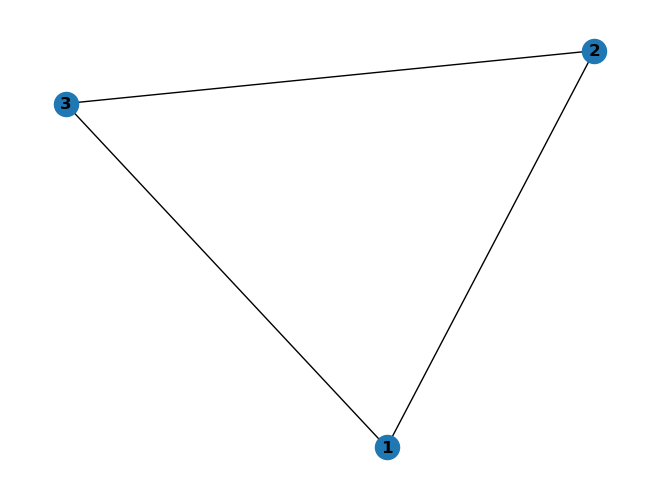

In [5]:
nx.draw(G, with_labels=True, font_weight='bold')

Here is a graph of the research team, connected by shared academic discipline.

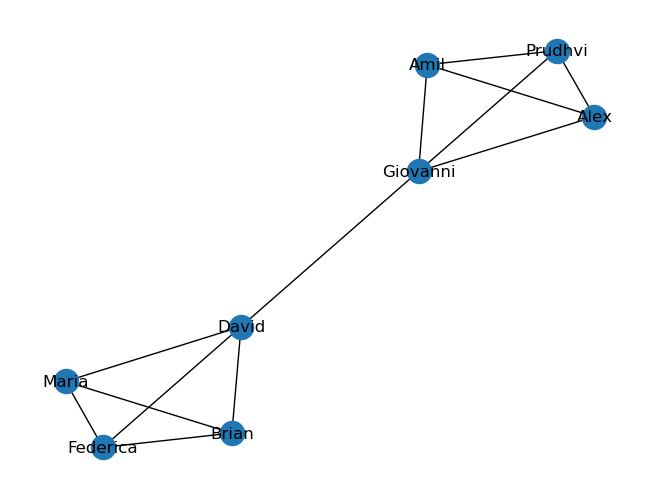

In [6]:
RT = nx.Graph()
RT.add_nodes_from(['Alex', 'Amil', 'Brian', 'David', 'Federica', 'Giovanni', 'Maria', 'Prudhvi'])
# Draw an edge where there is a shared discipline (chosen from computer/data science, philosophy, and physics [with some rough assumptions about who does what])
RT.add_edges_from([('Alex', 'Amil'), ('Alex', 'Giovanni'), ('Alex', 'Prudhvi'), ('Amil', 'Giovanni'), ('Amil', 'Prudhvi'), ('Brian', 'David'), ('Brian', 'Federica'), ('Brian', 'Maria'), ('David', 'Federica'), ('David', 'Giovanni'), ('David', 'Maria'), ('Federica', 'Maria'), ('Giovanni', 'Prudhvi')])
nx.draw(RT, with_labels=True)

# Create Graphs Using Generators

Networkx also contains a number of algorithms for generating graphs of various kinds. For example, we can create a random (Erdos-Renyi) graph with a given number of nodes, and a given probability of there being an edge between any two given nodes.

In [7]:
er = nx.erdos_renyi_graph(30, 0.15)

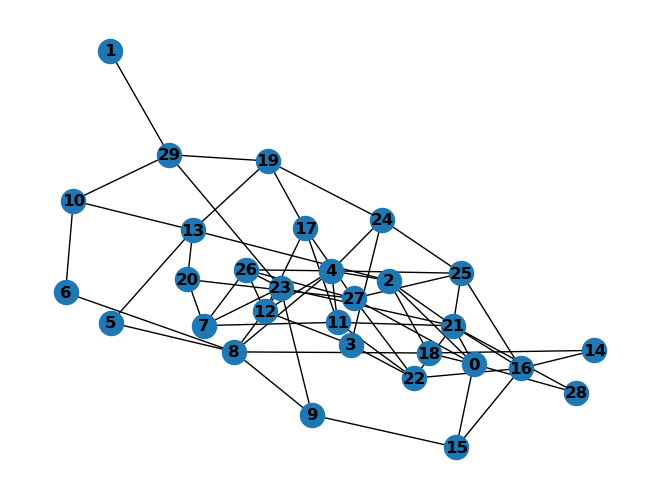

In [8]:
nx.draw(er, with_labels=True, font_weight='bold')

Equally, we can generate a Watts-Strogatz graph, which has a certain number of nodes intially arranged in a ring, or circle, with each node having a fixed number of nearest neighbours (that determines the thickness of the ring). There is then a specified probability for each edge that it gets rewired to connect the node at one end to another node chosen at random. 

In [9]:
ws = nx.watts_strogatz_graph(30, 2, 0.1)

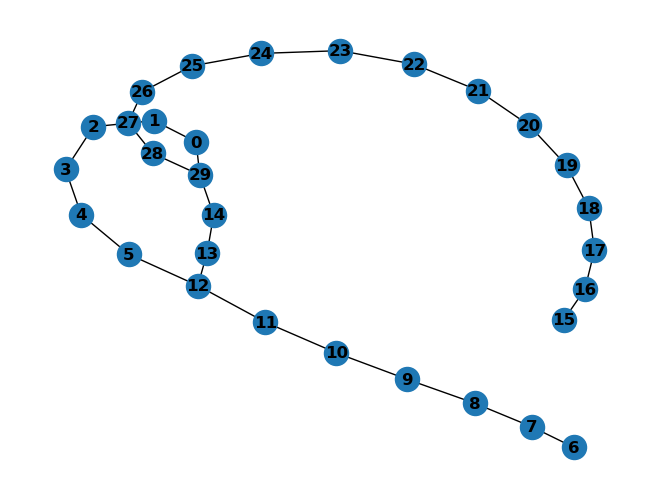

In [10]:
nx.draw(ws, with_labels=True, font_weight='bold')

We can also generate graphs using the preferential attachment model of Barabasi and Albert. Here we specify the number of nodes in the graph, and the number of edges to add when each new node is added. The nodes are added sequential, and are attached by edges to existing nodes with a probability that is determined by, and proportional to, the number of edges those existing edges already have. Thus, already well-connected nodes accumulate even more new nodes as the graph expands.

In [11]:
ba = nx.barabasi_albert_graph(30, 5)

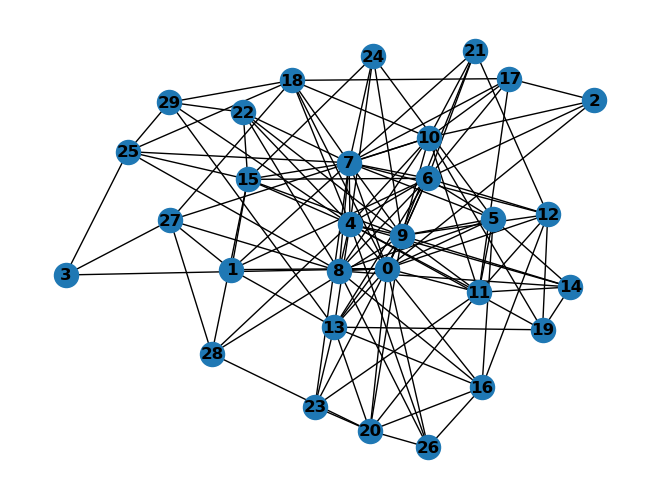

In [12]:
nx.draw(ba, with_labels=True, font_weight='bold')

# Analyze Network Structure

As we begin to analyze the structures of our graphs, it will be useful to be able to have some further visualization tools - so we import them here from the pyplot module of the matplotlib library. 

In [13]:
import matplotlib.pyplot as plt

## Erdos-Renyi Random Graph

The degree of a node is the number of edges it has. Here we produce a list of the degrees of the nodes in the random (Erdos-Renyi) graph we create earlier.

In [14]:
sorted(d for n, d in er.degree())

[1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 8]

And here we display this information visusally, in the form of a histogram.

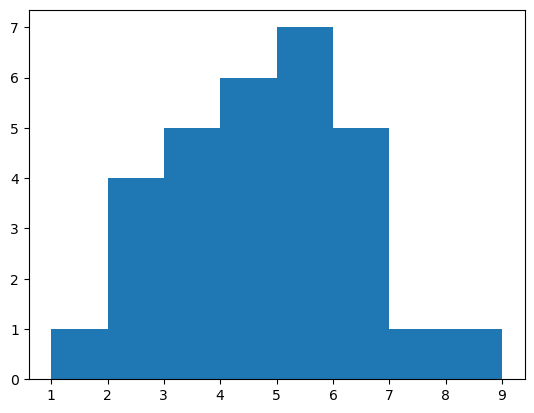

In [15]:
    degrees = [er.degree(n) for n in er.nodes()]
    max_degrees = max(degrees)
    min_degrees = min(degrees) # or 0
    bins    = range(min_degrees, max_degrees + 2)
    plt.xticks(range(max_degrees+2))
    plt.hist(degrees, bins=bins)
    plt.show()

The clustering coefficient of a node captures how many of that node's immediate connections are connected to one another - or how many of the possible triangles involving that node and its neighbours actually do make triangles. Here we call a function from network x that returns a list giving the clustering coefficient of each node.

In [16]:
nx.clustering(er)

{0: 0.2,
 1: 0,
 2: 0.2,
 3: 0,
 4: 0.14285714285714285,
 5: 0,
 6: 0,
 7: 0.16666666666666666,
 8: 0.06666666666666667,
 9: 0,
 10: 0,
 11: 0.1,
 12: 0.2,
 13: 0,
 14: 0,
 15: 0,
 16: 0.2,
 17: 0,
 18: 0.16666666666666666,
 19: 0,
 20: 0,
 21: 0.17857142857142858,
 22: 0.2,
 23: 0.13333333333333333,
 24: 0.16666666666666666,
 25: 0.2,
 26: 0.3,
 27: 0,
 28: 1.0,
 29: 0}

The average clustering in a graph is just the average of the clustering coefficients of its nodes.

In [17]:
nx.average_clustering(er)

0.12071428571428572

The density of a network is the fraction of the possible edges that could relate the nodes that actually do so.

In [18]:
nx.density(er)

0.1471264367816092

And the average shortest path length in a graph is an average, for each pair of nodes in the graph, of the length of the shortest path between those nodes. Working this out can be computationally expensive.

In [19]:
nx.average_shortest_path_length(er)

2.4091954022988507

## Watts-Strogatz Small World Graph

In this section, we get the same information as before, now in relation to the Watts-Strogatz graph we generated previously.

In [100]:
sorted(d for n, d in ws.degree())

[1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3]

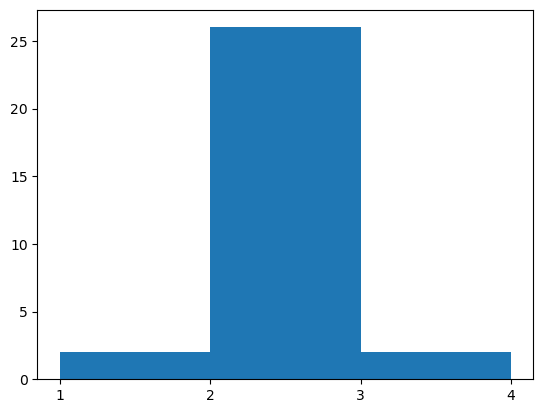

In [101]:
    ws_degrees = [ws.degree(n) for n in ws.nodes()]
    max_degrees = max(ws_degrees)
    min_degrees = min(ws_degrees) # or 0
    bins    = range(min_degrees, max_degrees + 2)
    plt.xticks(range(max_degrees+2))
    
    plt.hist(ws_degrees, bins=bins)
    plt.show()

In [102]:
nx.clustering(ws)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0}

In [103]:
nx.average_clustering(ws)

0.0

In [104]:
nx.density(ws)

0.06896551724137931

In [105]:
nx.average_shortest_path_length(ws)

8.163218390804598

## Barabasi-Albert Preferential Attachment Graph

And now we get that information about our Barabasi-Albert graph.

In [106]:
sorted(d for n, d in ba.degree())

[3,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 8,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 12,
 13,
 15,
 17,
 17,
 18]

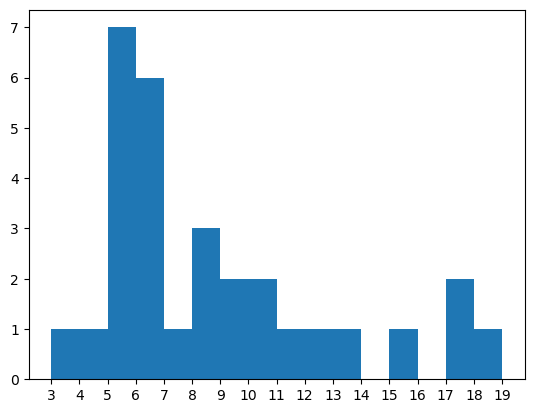

In [107]:
    ba_degrees = [ba.degree(n) for n in ba.nodes()]
    
    max_degrees = max(ba_degrees)
    min_degrees = min(ba_degrees) # or 0
    bins    = range(min_degrees, max_degrees + 2)

    plt.xticks(range(max_degrees+2))

    plt.hist(ba_degrees, bins=bins)
    plt.show()

In [108]:
nx.clustering(ba)

{0: 0.3137254901960784,
 1: 0.4666666666666667,
 2: 0.5,
 3: 0,
 4: 0.3235294117647059,
 5: 0.5,
 6: 0.41025641025641024,
 7: 0.34558823529411764,
 8: 0.3333333333333333,
 9: 0.3904761904761905,
 10: 0.3090909090909091,
 11: 0.37777777777777777,
 12: 0.42857142857142855,
 13: 0.35555555555555557,
 14: 0.5333333333333333,
 15: 0.4722222222222222,
 16: 0.47619047619047616,
 17: 0.4666666666666667,
 18: 0.39285714285714285,
 19: 0.3,
 20: 0.4642857142857143,
 21: 0.7,
 22: 0.6,
 23: 0.6,
 24: 0.8,
 25: 0.26666666666666666,
 26: 0.7,
 27: 0.13333333333333333,
 28: 0.4,
 29: 0.4}

In [109]:
nx.average_clustering(ba)

0.42533756548462426

In [110]:
nx.average_shortest_path_length(ba)

1.7747126436781608

# Comparison Table

In [151]:
# round(, 2) will round the numbers to 2 decimal places
table = [
    ["Metric", "Erdos-Renyi", "Watts-Strogatz", "Barabasi-Albert"],
    ["--------------------","---------------","---------------","---------------"],
    ["Nodes", er.number_of_nodes(), ws.number_of_nodes(), ba.number_of_nodes()],
    ["Edges", er.number_of_edges(), ws.number_of_edges(), ba.number_of_edges()],
    ["Avg Clustering", round(nx.average_clustering(er), 2), round(nx.average_clustering(ws), 2), round(nx.average_clustering(ba), 2)],
    ["Avg Shortest Path", round(nx.average_shortest_path_length(er), 2), round(nx.average_shortest_path_length(ws), 2), round(nx.average_shortest_path_length(ba), 2)],
    ["Density", round(nx.density(er), 2), round(nx.density(ws), 2), round(nx.density(ba), 2)]
]

# Below we format the output as a simple table. The output: {:<20} means left-align and pad to 20 characters.
# str() converts each value to a string to ensure consistent formatting.
for row in table:
    print("{:<20} {:<15} {:<15} {:<15}".format(str(row[0]), str(row[1]), str(row[2]), str(row[3])))



Metric               Erdos-Renyi     Watts-Strogatz  Barabasi-Albert
-------------------- --------------- --------------- ---------------
Nodes                30              30              30             
Edges                64              30              125            
Avg Clustering       0.12            0.0             0.43           
Avg Shortest Path    2.41            8.16            1.77           
Density              0.15            0.07            0.29           


# Import Graphs

So far we have generated the graphs we are analyzing ourselves, either manually or algorithmically. But it is also possible to import a graph from a pre-existing dataset. To analyze these large datasets, it is again useful to import some code from existing Python libraries.

In [31]:
import sys, math

In [32]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['e', 'degrees']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [33]:
import collections as col

## College Message

Here we look at (a simplification of) the College Message graph available from the Stanford Network Analysis Project: https://snap.stanford.edu/

We indicate where the file is that contains the information about this graph.

In [35]:
filepath = '../CollegeMsg/CollegeMsg-Flattened.txt'

We create an empty graph.

In [36]:
CMsg = nx.Graph()

And we then read the list of edges in our file into the graph.

In [37]:
fh = open(filepath, "r")
for line in fh.readlines():
    s = line.strip().split()
    if s[0] != "#":
        origin = int(s[0])
        dest = int(s[1])
        CMsg.add_edge(origin, dest)
fh.close()

We print out the number of nodes and edges in our graph.

In [38]:
print("The graph has", len(CMsg), "nodes and", len(CMsg.edges()), "edges")

The graph has 1899 nodes and 13838 edges


A graph is connected if there is a path between any two nodes it contains. Here we check whether the College Message graph is connected.

In [39]:
print("Is the graph simply connected?", nx.is_connected(CMsg))

Is the graph simply connected? False


Here we condense the above into some briefer code.

In [40]:
CMsg = nx.read_edgelist(filepath)
CMsg.number_of_edges(), CMsg.number_of_nodes(), nx.is_connected(CMsg)

(13838, 1899, False)

Here we find out how many connected sub-graphs there are in the College Message graph.

In [41]:
print("The graph has", nx.number_connected_components(CMsg), "connected components")

The graph has 4 connected components


And now we determine how many nodes there are in each of these subgraphs.

In [42]:
for k in nx.connected_components(CMsg):
    print(len(k))

1893
2
2
2


In the next few cells, we create a new graph, which is the largest connected component of our original graph.

In [43]:
nx.connected_components(CMsg)

<generator object connected_components at 0x0000022607EFBF10>

In [44]:
graphs = list(nx.connected_components(CMsg))

In [45]:
CCMsg = CMsg.subgraph(graphs[0])

What is the size of (i.e. number of nodes in) that graph?

In [46]:
len(CCMsg)

1893

How many nodes in the original graph have been excluded?

In [47]:
print(len(CMsg) - len(CCMsg))

6


Is the new graph connected?

In [48]:
print("Check that the graph is now connected")
nx.is_connected(CCMsg)

Check that the graph is now connected


True

Now we turn to analyzing the structure of the new graph. We begin by counting the triangles at each node.

In [49]:
nx.triangles(CCMsg)

{'1': 59,
 '2': 2,
 '3': 772,
 '4': 0,
 '5': 0,
 '6': 146,
 '7': 1,
 '8': 114,
 '9': 746,
 '10': 0,
 '11': 0,
 '12': 504,
 '13': 0,
 '14': 0,
 '15': 2,
 '16': 0,
 '17': 1,
 '18': 0,
 '19': 77,
 '20': 1,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 28,
 '27': 89,
 '28': 0,
 '29': 3,
 '30': 18,
 '31': 0,
 '32': 1095,
 '33': 1,
 '34': 72,
 '35': 0,
 '36': 212,
 '37': 0,
 '38': 6,
 '39': 1,
 '40': 0,
 '41': 541,
 '42': 570,
 '43': 2,
 '44': 144,
 '45': 0,
 '46': 1,
 '47': 0,
 '48': 50,
 '49': 0,
 '50': 103,
 '51': 23,
 '52': 55,
 '53': 88,
 '54': 0,
 '55': 0,
 '56': 18,
 '57': 1,
 '58': 43,
 '59': 12,
 '60': 53,
 '61': 14,
 '62': 150,
 '63': 111,
 '64': 2,
 '65': 0,
 '66': 3,
 '67': 415,
 '68': 71,
 '69': 31,
 '70': 3,
 '71': 0,
 '72': 246,
 '73': 71,
 '74': 68,
 '75': 6,
 '76': 0,
 '77': 0,
 '78': 1,
 '79': 8,
 '80': 26,
 '81': 7,
 '82': 0,
 '83': 5,
 '84': 19,
 '85': 17,
 '86': 1,
 '87': 3,
 '88': 91,
 '89': 1,
 '90': 59,
 '91': 0,
 '92': 0,
 '93': 6,
 '94': 2,
 '95': 50,
 '9

Then we work out the total number of triangles in the graph.

In [50]:
tt = sum(list(nx.triangles(CCMsg).values()))/3
print(tt)

14319.0


And here we compute another measure of clustering in the graph: the transitivity of a graph is the total number of triangles in the graph divided by the number of possible triangles in a graph of that size.

In [51]:
print(nx.transitivity(CCMsg))

0.056830298909088986


Notice that this measure differs from the average clustering.

In [52]:
print("The average clustering coefficient of the College Message network is")
nx.average_clustering(CCMsg)

The average clustering coefficient of the College Message network is


0.10974567163130962

Here we work out the average shortest path length in the graph: recall that this is computationally expensive!

In [53]:
nx.average_shortest_path_length(CCMsg)

3.0551670838037994

And we compare this to the logarithm of the size of the graph. Since they are roughly the same we say (following Watts and Strogatz) that the College Message network is a small world.

In [54]:
np.log10(len(CCMsg))

3.277150613963797

## Karate

A famous graph in network science is that of Zachary's karate club. Networkx has some code that directly generates this graph. What are some of its structural properties? And what does it look like?

In [55]:
k = nx.karate_club_graph()
k.number_of_nodes(), k.number_of_edges()

(34, 78)

In [56]:
print(nx.density(k), nx.average_clustering(k), nx.average_shortest_path_length(k))

0.13903743315508021 0.5706384782076823 2.408199643493761


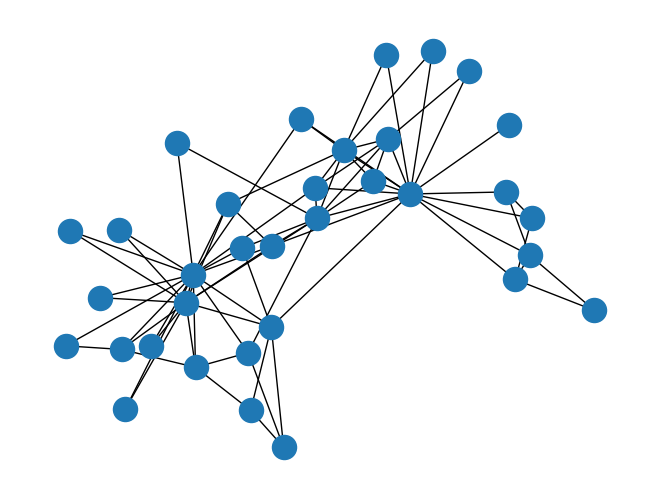

In [57]:
nx.draw(k)

In [58]:
k_degree_sequence = sorted((d for n, d in k.degree()), reverse=True)
print(f"Average degree: {np.average(k_degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(k)}")

Average degree: 4.588235294117647
Clustering coefficient: 0.5706384782076823


## Les Miserables

Of potential interest to literary scholars, networkx also has a means of generating a graph of characters in Victor Hugo's Les Miserables who appear in the same scene (or at least, who are mentioned within a certain distance of one another in the text). We examine this graph here.

In [59]:
les = nx.les_miserables_graph()
les.number_of_nodes(), les.number_of_edges()

(77, 254)

In [60]:
print(nx.density(les), nx.average_clustering(les), nx.average_shortest_path_length(les))

0.08680792891319207 0.5731367499320134 2.6411483253588517


Here we draw the graph with the names of the characters showing.

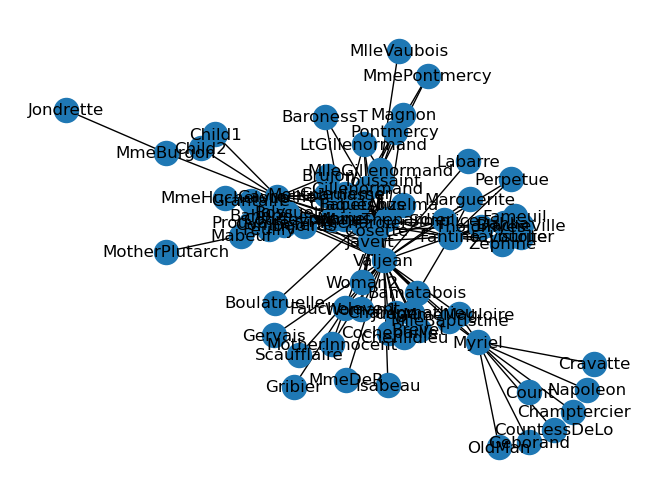

In [61]:
nx.draw(les, with_labels=True)

In [62]:
degree_sequence = sorted((d for n, d in les.degree()), reverse=True)
print(f"Average degree: {np.average(degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(les)}")

Average degree: 6.597402597402597
Clustering coefficient: 0.5731367499320134


In [63]:
for i in sorted(les.degree()):
    print(i[0], les.degree()[i[0]])

Anzelma 3
Babet 10
Bahorel 12
Bamatabois 8
BaronessT 2
Blacheville 7
Bossuet 13
Boulatruelle 1
Brevet 6
Brujon 7
Champmathieu 6
Champtercier 1
Chenildieu 6
Child1 2
Child2 2
Claquesous 10
Cochepaille 6
Combeferre 11
Cosette 11
Count 1
CountessDeLo 1
Courfeyrac 13
Cravatte 1
Dahlia 7
Enjolras 15
Eponine 11
Fameuil 7
Fantine 15
Fauchelevent 4
Favourite 7
Feuilly 11
Gavroche 22
Geborand 1
Gervais 1
Gillenormand 7
Grantaire 10
Gribier 1
Gueulemer 10
Isabeau 1
Javert 17
Joly 12
Jondrette 1
Judge 6
Labarre 1
Listolier 7
LtGillenormand 4
Mabeuf 11
Magnon 2
Marguerite 2
Marius 19
MlleBaptistine 3
MlleGillenormand 7
MlleVaubois 1
MmeBurgon 2
MmeDeR 1
MmeHucheloup 7
MmeMagloire 3
MmePontmercy 2
MmeThenardier 11
Montparnasse 9
MotherInnocent 2
MotherPlutarch 1
Myriel 10
Napoleon 1
OldMan 1
Perpetue 2
Pontmercy 3
Prouvaire 9
Scaufflaire 1
Simplice 4
Thenardier 16
Tholomyes 9
Toussaint 3
Valjean 36
Woman1 2
Woman2 3
Zephine 7


Here we display the ego graphs of some of the central characters: that is, the graphs that are centered on those characters and that display just theiir neighbours (and the relations between them).

0.16816816816816818 0.71575624516801 1.8318318318318318


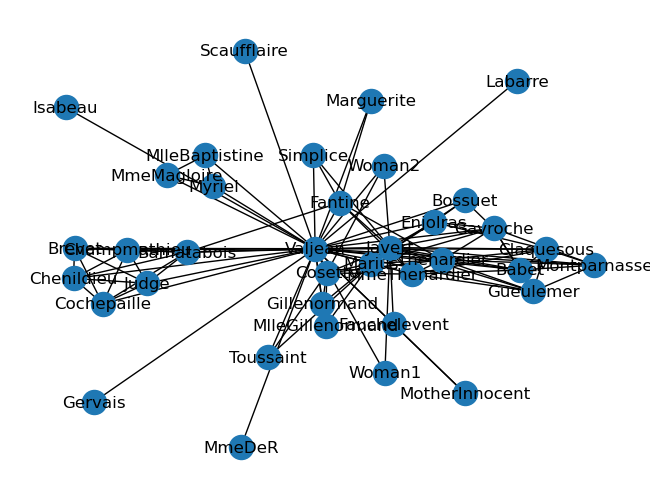

In [64]:
V = nx.ego_graph(les, "Valjean")
nx.draw(V, with_labels=True)
print(nx.density(V), nx.average_clustering(V), nx.average_shortest_path_length(V))

0.39869281045751637 0.8103304284676833 1.6013071895424837


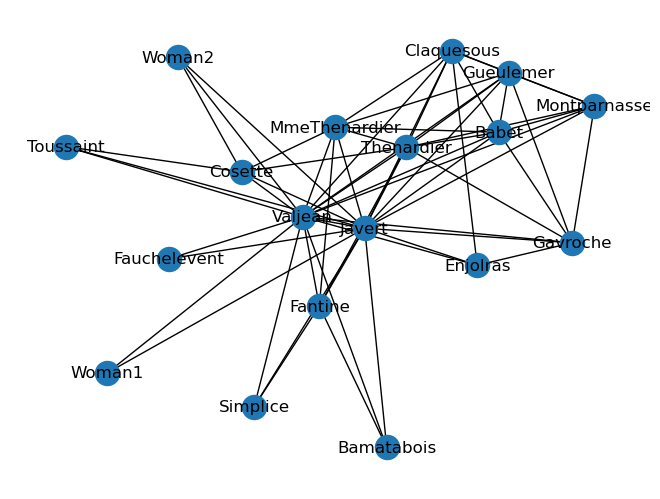

In [65]:
J = nx.ego_graph(les, "Javert")
nx.draw(J, with_labels=True)
print(nx.density(J), nx.average_clustering(J), nx.average_shortest_path_length(J))

0.48484848484848486 0.8076779701779703 1.5151515151515151


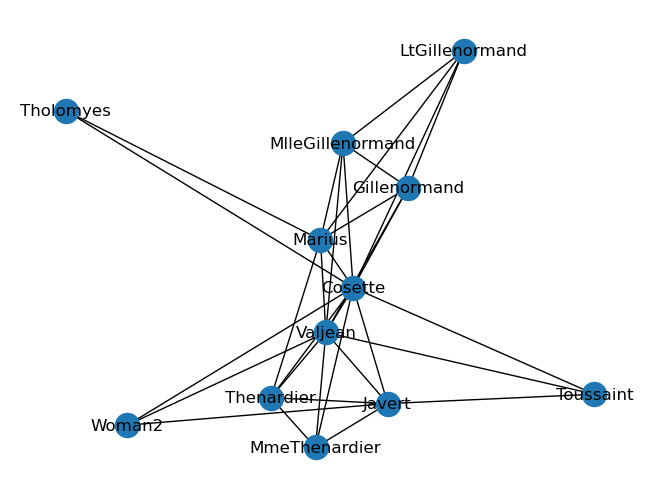

In [66]:
C = nx.ego_graph(les, "Cosette")
nx.draw(C, with_labels=True)
print(nx.density(C), nx.average_clustering(C), nx.average_shortest_path_length(C))

## Francis Bacon

Here we look at a graph of interest to historians and philosophers, drawn from https://www.sixdegreesoffrancisbacon.com/. We need to import the numpy library to help with this. Note also that the graph is stored in a different file format than the College Message text file.

In [67]:
import numpy as np

In [68]:
# Load graph from GML file
fb = nx.read_gml('../drafts/francisbacon.gml.gz', destringizer=int)


In [69]:
print("Is the graph simply connected?", nx.is_connected(fb))
print('The number of connected components is', nx.number_connected_components(fb))

Is the graph simply connected? True
The number of connected components is 1


In [70]:
print('The number of nodes is', len(fb.nodes()))
print('and the number of edges is', len(fb.edges))

The number of nodes is 13033
and the number of edges is 171551


In [71]:
# Display the node data
fb.nodes(data=True)

NodeDataView({0: {'name': 'Mildred Cecil', 'original_id': 10002248, 'groups': [58, 128]}, 1: {'name': 'Thomas Cecil', 'original_id': 10002250}, 106: {'name': 'John Carver', 'original_id': 10002157, 'groups': [107, 20]}, 107: {'name': 'William Brewster', 'original_id': 10001533, 'groups': [20, 107, 114]}, 138: {'name': 'Barbara Apsley', 'original_id': 10050002}, 139: {'name': 'Sir Allen Apsley', 'original_id': 10000252, 'groups': [59]}, 184: {'name': 'Sir Martin Frobisher', 'original_id': 10004588, 'groups': [9]}, 185: {'name': 'Nutaaq', 'original_id': 10013294}, 272: {'name': 'George North', 'original_id': 10008901, 'groups': [123, 131]}, 273: {'name': 'Henry Bynneman', 'original_id': 10001903, 'groups': [116, 121]}, 274: {'name': 'Sir Thomas North', 'original_id': 10008908, 'groups': [123]}, 42: {'name': 'Sir Christopher Hatton', 'original_id': 10005664, 'groups': [124]}, 311: {'name': 'Robert Dudley', 'original_id': 10003747}, 363: {'name': 'William Herle', 'original_id': 10005852, '

The graph as a whole is too large to usefully visualize with networkx, but we can look at a subgraph.

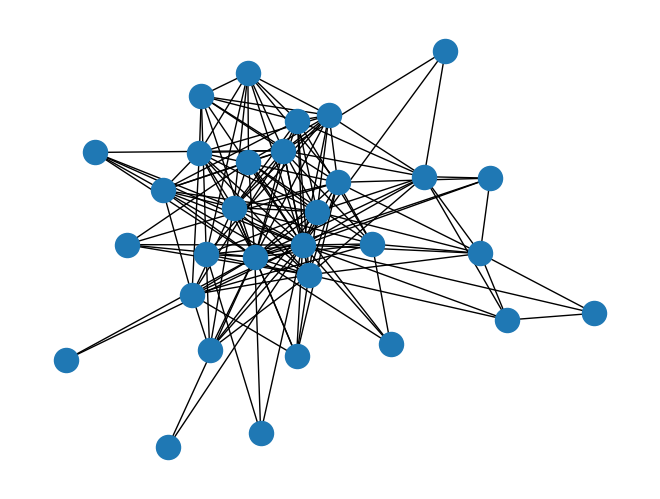

In [85]:
# Display the ego graph of the first node, Mildred Cecil
MC = nx.ego_graph(fb, 0)
nx.draw(MC)

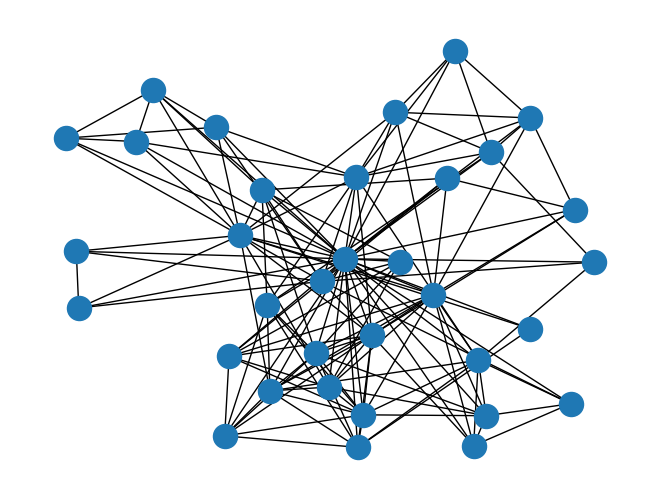

In [89]:
# Display the ego graph for Margaret Cavendish (node 2434)

MCa = nx.ego_graph(fb, 2434)
nx.draw(MCa)

 A standrd (1-hop) ego graph includes the central node (ego) and all its immediate neighbors. But a 2-hop ego graph includes the central node, its immediate neighbors, and the neighbors of those neighbors. 
 
 It will be a lot larger and take much longer to draw.

Number of nodes in the one-hop graph: 34
Number of nodes in the two-hop graph: 3523


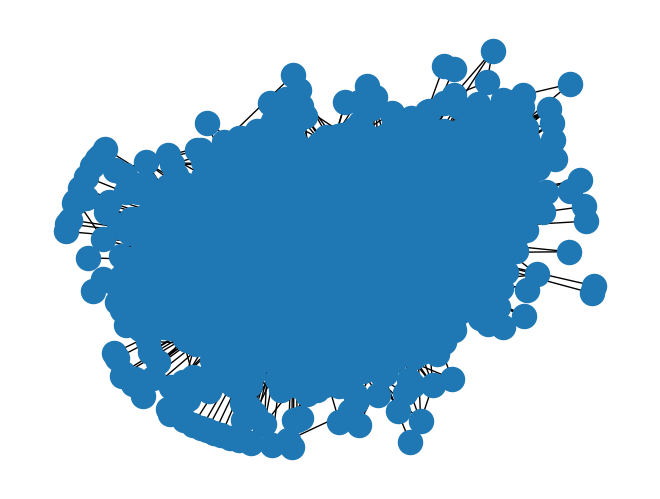

In [93]:
MCa_2hop = nx.ego_graph(fb, 2434, radius=2)

print("Number of nodes in the one-hop graph:", len(MCa.nodes()))
print("Number of nodes in the two-hop graph:", len(MCa_2hop.nodes()))

nx.draw(MCa_2hop)


Even with only 2 degrees of separation, the Margaret Cavendish graph is hard to visualize in networkx.
Plotly provides a simple alternative that can display large networks more effectively, with an interactive zoom functionality.
However, a graph of this size will still be hard to see.

In [188]:
try:
    import plotly
except ImportError:
    !pip install plotly networkx


In [189]:
import plotly.graph_objs as go
from networkx.drawing.layout import spring_layout

In [191]:
MCa_2hop = nx.ego_graph(fb, 2434, radius=2)
pos = spring_layout(MCa_2hop)
nx_graph_trace = go.Scatter(
    x=[pos[n][0] for n in MCa_2hop.nodes()],
    y=[pos[n][1] for n in MCa_2hop.nodes()],
    mode='markers+lines',
    line=dict(width=1, color='#888'),
    marker=dict(size=10, color='skyblue')
)
fig = go.Figure(data=[nx_graph_trace])

fig.update_layout(
    width=800,  
    height=800,  
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), 
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white'
)

fig.show()


Degrees

In [73]:
fb_degree_sequence = sorted((d for n, d in fb.degree()), reverse=True)
print(fb_degree_sequence)
print(f"Average degree: {np.average(fb_degree_sequence)}")

[2305, 1982, 1906, 1461, 1147, 1101, 1100, 777, 766, 766, 713, 698, 672, 668, 629, 614, 565, 530, 530, 520, 491, 477, 473, 457, 453, 448, 437, 434, 423, 392, 387, 371, 365, 364, 358, 357, 356, 354, 353, 348, 336, 333, 332, 332, 327, 321, 318, 318, 313, 310, 307, 302, 294, 290, 288, 287, 286, 283, 277, 275, 267, 266, 264, 263, 259, 257, 254, 251, 251, 248, 241, 238, 238, 237, 236, 233, 233, 228, 228, 225, 224, 223, 221, 221, 220, 220, 220, 219, 219, 219, 218, 215, 214, 214, 213, 212, 210, 209, 207, 206, 205, 205, 204, 204, 203, 203, 201, 201, 200, 200, 198, 197, 196, 196, 196, 195, 194, 192, 191, 189, 189, 188, 187, 186, 186, 184, 183, 183, 183, 181, 181, 181, 180, 180, 180, 179, 179, 178, 176, 175, 175, 174, 173, 172, 171, 171, 171, 170, 170, 169, 168, 166, 166, 165, 165, 163, 162, 161, 160, 160, 158, 158, 158, 158, 158, 158, 158, 156, 156, 156, 155, 155, 154, 154, 154, 152, 152, 152, 151, 151, 151, 150, 150, 150, 150, 150, 150, 149, 149, 148, 147, 147, 147, 146, 146, 145, 145, 145, 14

In [74]:
fbdeg = dict(fb.degree()).values()
print(fbdeg)

dict_values([30, 85, 9, 30, 3, 47, 88, 9, 3, 23, 29, 205, 448, 26, 1, 20, 1, 5, 25, 4, 8, 2, 1, 154, 197, 2, 128, 37, 3, 3, 5, 698, 214, 21, 17, 24, 37, 1, 84, 5, 6, 1, 20, 4, 2, 4, 4, 1101, 23, 47, 27, 163, 2305, 204, 766, 152, 84, 332, 288, 40, 142, 33, 67, 321, 191, 88, 423, 8, 4, 3, 76, 40, 113, 140, 23, 22, 1, 3, 45, 10, 11, 251, 2, 16, 28, 473, 7, 36, 21, 104, 1, 27, 4, 3, 248, 1, 1, 90, 2, 9, 114, 3, 16, 1, 1, 3, 15, 194, 114, 130, 259, 61, 83, 302, 1, 79, 77, 64, 491, 17, 25, 48, 1, 3, 66, 104, 58, 40, 61, 105, 353, 158, 131, 22, 73, 22, 51, 1, 100, 1, 48, 55, 1, 6, 62, 3, 2, 22, 75, 219, 10, 37, 51, 238, 3, 25, 45, 33, 50, 36, 38, 179, 65, 9, 79, 53, 74, 80, 108, 57, 98, 134, 90, 2, 68, 20, 1, 3, 1, 74, 6, 54, 12, 5, 14, 4, 35, 16, 61, 1982, 1, 28, 766, 64, 22, 2, 67, 87, 82, 25, 40, 31, 26, 1, 2, 3, 1, 24, 141, 5, 2, 2, 219, 150, 34, 1, 53, 108, 1, 49, 201, 1, 3, 4, 78, 139, 39, 1, 19, 221, 6, 1906, 1, 71, 24, 275, 55, 4, 15, 36, 2, 2, 13, 11, 103, 26, 1, 8, 41, 57, 34, 160, 

In [75]:
from collections import Counter

fbdeg_distri = Counter(fbdeg)
print(fbdeg_distri)

Counter({1: 598, 2: 509, 4: 506, 3: 491, 6: 482, 5: 450, 7: 436, 8: 433, 9: 421, 11: 414, 10: 407, 12: 374, 13: 369, 16: 354, 14: 344, 15: 329, 18: 286, 19: 280, 17: 274, 21: 265, 20: 248, 22: 235, 23: 207, 24: 206, 28: 163, 26: 162, 25: 159, 31: 153, 29: 152, 27: 152, 32: 137, 30: 133, 33: 122, 36: 116, 34: 116, 35: 102, 40: 101, 38: 95, 37: 93, 39: 92, 43: 70, 42: 69, 44: 69, 41: 68, 45: 67, 47: 52, 53: 52, 51: 51, 49: 49, 50: 45, 48: 44, 54: 44, 46: 43, 67: 37, 59: 36, 55: 35, 61: 34, 57: 34, 52: 34, 63: 34, 58: 33, 65: 32, 56: 31, 69: 31, 62: 28, 60: 28, 66: 27, 68: 26, 64: 25, 73: 24, 70: 24, 79: 23, 74: 23, 75: 22, 77: 21, 72: 20, 81: 20, 84: 18, 71: 17, 85: 16, 82: 16, 76: 15, 83: 14, 92: 14, 88: 13, 105: 13, 80: 13, 95: 13, 89: 13, 87: 12, 78: 12, 101: 12, 96: 11, 100: 10, 113: 9, 102: 9, 90: 8, 114: 8, 108: 8, 86: 8, 91: 8, 109: 8, 107: 8, 158: 7, 93: 7, 119: 7, 99: 7, 97: 7, 150: 6, 103: 6, 115: 6, 122: 6, 117: 6, 130: 5, 94: 5, 118: 5, 124: 5, 112: 5, 104: 4, 98: 4, 134: 4, 

(1.0, 10000.0, 1e-05, 1.0)

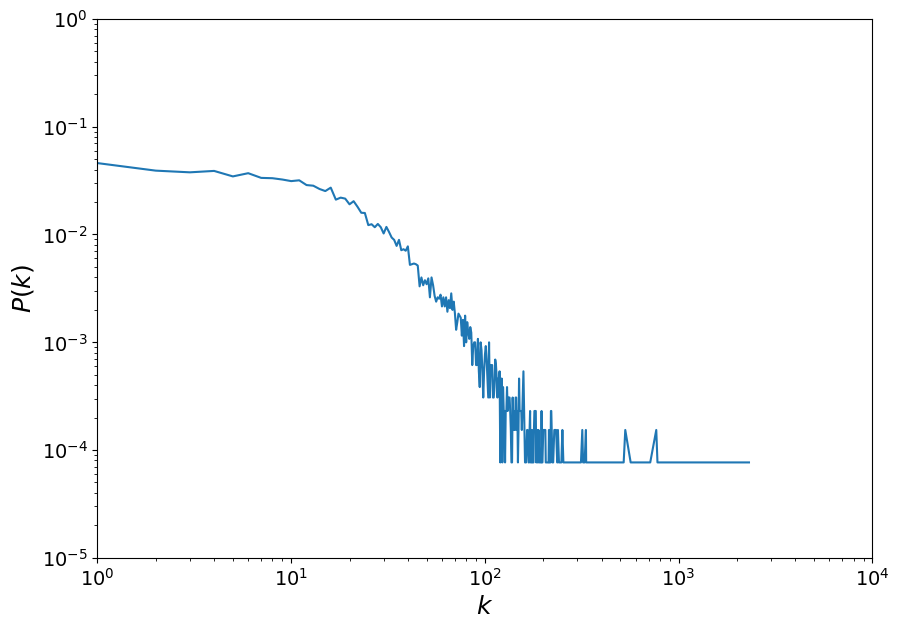

In [76]:
x = []
y = []

for i in sorted(fbdeg_distri):
    x.append(i)
    y.append(fbdeg_distri[i] / len(fb))

plt.figure(figsize=(10, 7))
plt.plot(x, y)

plt.xlabel("$k$", fontsize=18)
plt.ylabel("$P(k)$", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale("log")
plt.xscale("log")
plt.axis([1, 10000, 0.00001, 1.0])

In the above we can see that the Francis Bacon network approximates the preferential attachment model, with a large number of nodes with few edges, and a much smaller number that have many connections.

Clustering

In [77]:
nx.triangles(fb)

{0: 125,
 1: 311,
 106: 14,
 107: 100,
 138: 3,
 139: 200,
 184: 372,
 185: 10,
 272: 1,
 273: 25,
 274: 64,
 42: 1522,
 311: 4522,
 363: 123,
 830: 0,
 831: 36,
 843: 0,
 844: 1,
 849: 86,
 850: 6,
 851: 17,
 832: 0,
 870: 0,
 871: 841,
 872: 1425,
 1094: 1,
 408: 828,
 312: 109,
 1166: 2,
 1186: 2,
 1187: 6,
 20: 8278,
 848: 985,
 1188: 40,
 833: 29,
 1556: 92,
 1753: 168,
 1754: 0,
 1775: 385,
 1776: 7,
 1837: 7,
 1840: 0,
 1841: 37,
 1851: 1,
 1852: 0,
 867: 6,
 868: 6,
 18: 13668,
 1856: 62,
 2393: 142,
 619: 70,
 2430: 882,
 182: 24759,
 1693: 1153,
 165: 5546,
 2431: 1104,
 355: 453,
 59: 2663,
 320: 1823,
 2432: 165,
 2433: 751,
 2434: 114,
 2435: 278,
 1735: 2057,
 1202: 1037,
 301: 539,
 315: 2658,
 3457: 15,
 1853: 3,
 1854: 2,
 2155: 327,
 1246: 117,
 231: 416,
 1831: 806,
 5443: 60,
 4490: 42,
 4491: 0,
 5441: 2,
 4492: 128,
 5545: 19,
 432: 20,
 1194: 1983,
 5442: 1,
 5468: 9,
 225: 129,
 137: 4560,
 2114: 7,
 2230: 109,
 5225: 67,
 613: 498,
 5722: 0,
 5083: 45,
 5727: 3

In [115]:
# total triangles in the Francis Bacon graph
tt = sum(list(nx.triangles(fb).values()))
print('The total number of triangles in the Francis Bacon graph is', tt/3)

# transitivity
print('The transitivity of the graph is', nx.transitivity(fb))

The total number of triangles in the Francis Bacon graph is 495810.0
The transitivity of the graph is 0.0632733133784371


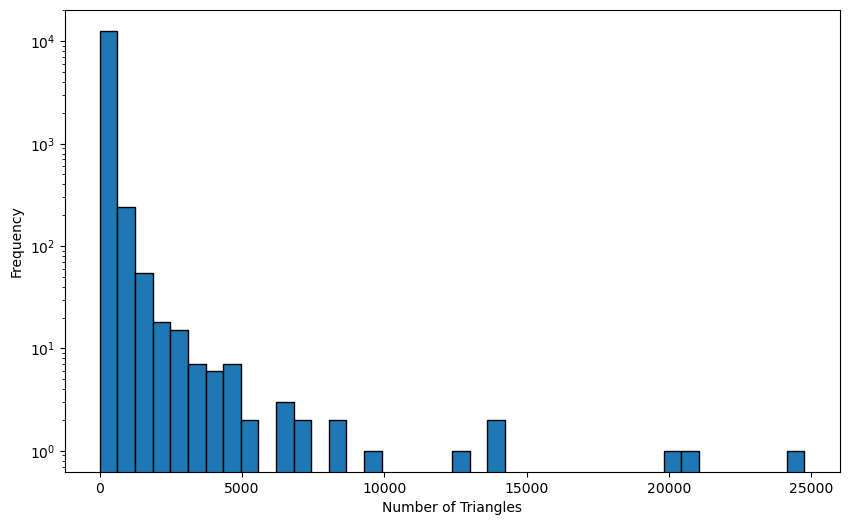

In [123]:
# Distribution of triangles in the Francis Bacon graph
# This will show how many nodes are part of each number of triangles.

plt.figure(figsize=(10, 6))
plt.hist(list(nx.triangles(fb).values()), bins=40, edgecolor='black')
plt.xlabel("Number of Triangles")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()


In [ ]:
nx.clustering(fb)

In [80]:
print('The average clustering is', nx.average_clustering(fb))

The average clustering is 0.2647243549916584


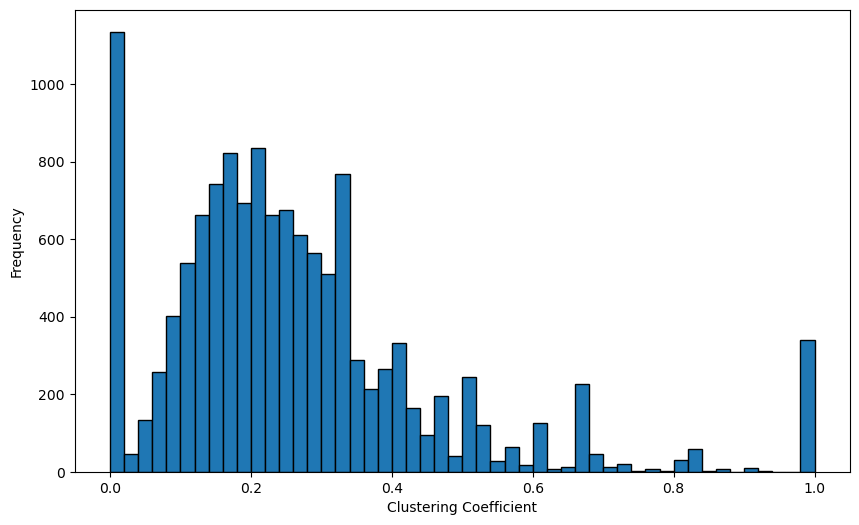

In [124]:
# Distribution of clustering coefficients of nodes in the Francis Bacon graph

plt.figure(figsize=(10, 6))
plt.hist(list(nx.clustering(fb).values()), bins=50, edgecolor='black')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()


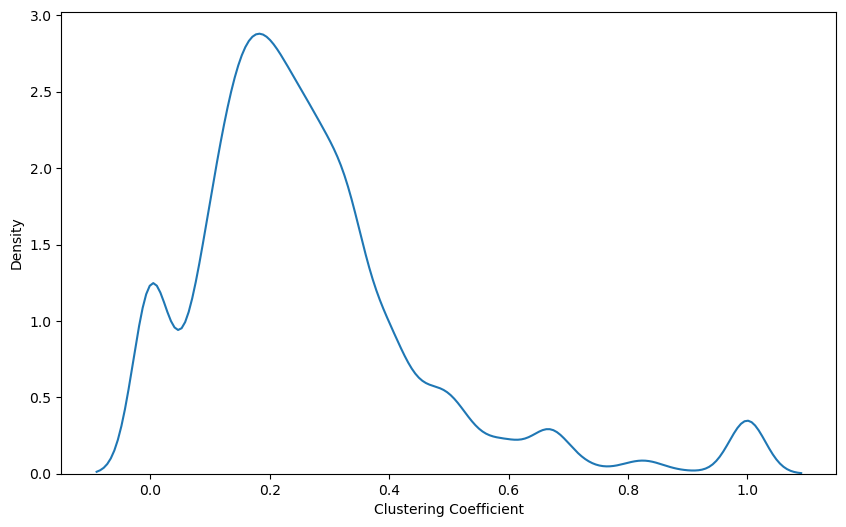

In [126]:
# KDE plot of clustering coefficients
# A KDE plot is a continuous analogue of a histogram.
# These are easiest to draw using the seaborn package.

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(list(nx.clustering(fb).values()))
plt.xlabel("Clustering Coefficient")
plt.ylabel("Density")
plt.show()



Paths

In [127]:
# The diameter (aka longest shortest path)

print('The diameter of the Francis Bacon graph is', nx.diameter(fb))

The diameter of the Francis Bacon graph is 9


In [128]:
# Maybe it would have been more efficient to compute and save the eccentricity, then find the max and the average? In any case, here we look at...

# Average shortest path
print('The average shortest path length is', nx.average_shortest_path_length(fb))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dafid\AppData\Local\Temp\ipykernel_40096\3133901676.py", line 4, in <module>
    print('The average shortest path length is', nx.average_shortest_path_length(fb))
                                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 429, in average_shortest_path_length
    s = sum(l for u in G for l in path_length(u).values())
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 429, in <genexpr>
    s = sum(l for u in G for l in path_length(u).values())
                                  ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packag

In [ ]:
print('The logarithm of the size of the network is', np.log10(len(fb)))

So the Francis Bacon network is small world: its average shortest path is the same order of magnitude as the logarithm of its size.

Centrality

Here we get the degree centrality for each node: this is a measure of how many neighbours the node has, relative to how many it could have in a network of the same size.

In [129]:
nx.degree_centrality(fb)

{0: 0.002302025782688766,
 1: 0.006522406384284837,
 106: 0.0006906077348066298,
 107: 0.002302025782688766,
 138: 0.0002302025782688766,
 139: 0.0036065070595457335,
 184: 0.006752608962553713,
 185: 0.0006906077348066298,
 272: 0.0002302025782688766,
 273: 0.0017648864333947205,
 274: 0.002225291589932474,
 42: 0.0157305095150399,
 311: 0.0343769183548189,
 363: 0.001995089011663597,
 830: 7.67341927562922e-05,
 831: 0.001534683855125844,
 843: 7.67341927562922e-05,
 844: 0.000383670963781461,
 849: 0.001918354818907305,
 850: 0.0003069367710251688,
 851: 0.0006138735420503376,
 832: 0.0001534683855125844,
 870: 7.67341927562922e-05,
 871: 0.011817065684468999,
 872: 0.015116635972989564,
 1094: 0.0001534683855125844,
 408: 0.009821976672805401,
 312: 0.0028391651319828112,
 1166: 0.0002302025782688766,
 1186: 0.0002302025782688766,
 1187: 0.000383670963781461,
 20: 0.05356046654389195,
 848: 0.01642111724984653,
 1188: 0.001611418047882136,
 833: 0.0013044812768569674,
 1556: 0.0018

In [130]:
fb_deg_cent = dict(nx.degree_centrality(fb)).values()
print(sorted(fb_deg_cent, reverse=True))

[0.1768723143032535, 0.15208717004297115, 0.14625537139349293, 0.1121086556169429, 0.08801411909146716, 0.08448434622467771, 0.08440761203192142, 0.059622467771639036, 0.058778391651319824, 0.058778391651319824, 0.05471147943523633, 0.05356046654389195, 0.051565377532228354, 0.051258440761203186, 0.04826580724370779, 0.04711479435236341, 0.04335481890730509, 0.04066912216083486, 0.04066912216083486, 0.03990178023327194, 0.037676488643339466, 0.03660220994475138, 0.03629527317372621, 0.03506752608962553, 0.03476058931860036, 0.0343769183548189, 0.03353284223449969, 0.033302639656230815, 0.0324585635359116, 0.03007980356046654, 0.02969613259668508, 0.028468385512584404, 0.028007980356046652, 0.02793124616329036, 0.027470841006752608, 0.027394106813996316, 0.02731737262124002, 0.027163904235727437, 0.027087170042971145, 0.026703499079189685, 0.025782688766114177, 0.0255524861878453, 0.02547575199508901, 0.02547575199508901, 0.02509208103130755, 0.024631675874769797, 0.024401473296500917, 

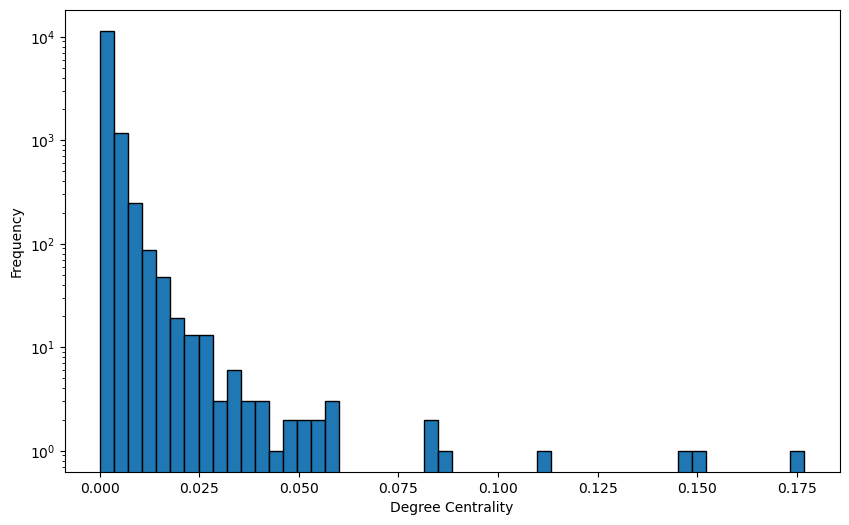

In [136]:
# Distribution of degree centrality of nodes in the Francis Bacon graph

plt.figure(figsize=(10, 6))
plt.hist(list(nx.degree_centrality(fb).values()), bins=50, edgecolor='black')
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()


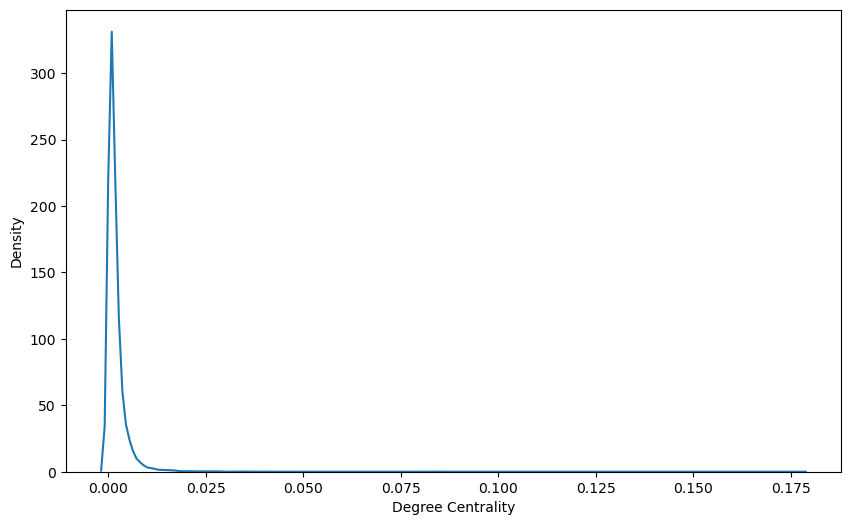

In [166]:
# KDE plot of degree centrality of nodes

plt.figure(figsize=(10, 6))
sns.kdeplot(list(nx.degree_centrality(fb).values()))
plt.xlabel("Degree Centrality")
plt.ylabel("Density")
plt.show()


In [153]:
fb_deg_cent2 = dict(nx.degree_centrality(fb))
print(fb_deg_cent2)

# Is there a way to find the node with the max degree centrality? And disply the ego graph of that node?

{0: 0.002302025782688766, 1: 0.006522406384284837, 106: 0.0006906077348066298, 107: 0.002302025782688766, 138: 0.0002302025782688766, 139: 0.0036065070595457335, 184: 0.006752608962553713, 185: 0.0006906077348066298, 272: 0.0002302025782688766, 273: 0.0017648864333947205, 274: 0.002225291589932474, 42: 0.0157305095150399, 311: 0.0343769183548189, 363: 0.001995089011663597, 830: 7.67341927562922e-05, 831: 0.001534683855125844, 843: 7.67341927562922e-05, 844: 0.000383670963781461, 849: 0.001918354818907305, 850: 0.0003069367710251688, 851: 0.0006138735420503376, 832: 0.0001534683855125844, 870: 7.67341927562922e-05, 871: 0.011817065684468999, 872: 0.015116635972989564, 1094: 0.0001534683855125844, 408: 0.009821976672805401, 312: 0.0028391651319828112, 1166: 0.0002302025782688766, 1186: 0.0002302025782688766, 1187: 0.000383670963781461, 20: 0.05356046654389195, 848: 0.01642111724984653, 1188: 0.001611418047882136, 833: 0.0013044812768569674, 1556: 0.0018416206261510127, 1753: 0.0028391651

Find the node with greatest degree centrality

In [175]:
max_cent_node = max(fb_deg_cent2, key=fb_deg_cent2.get)

print("Node with maximum degree centrality:", max_cent_node)
print("Its degree centrality value:", fb_deg_cent2[max_cent_node])
print("Degree of the node ", {max_cent_node}, " : ", fb.degree(max_cent_node))


Node with maximum degree centrality: 182
Its degree centrality value: 0.1768723143032535
Degree of the node  {182}  :  2305


Draw the ego graph of the node with the greatest degree centrality
(This might take a couple of minutes to draw)

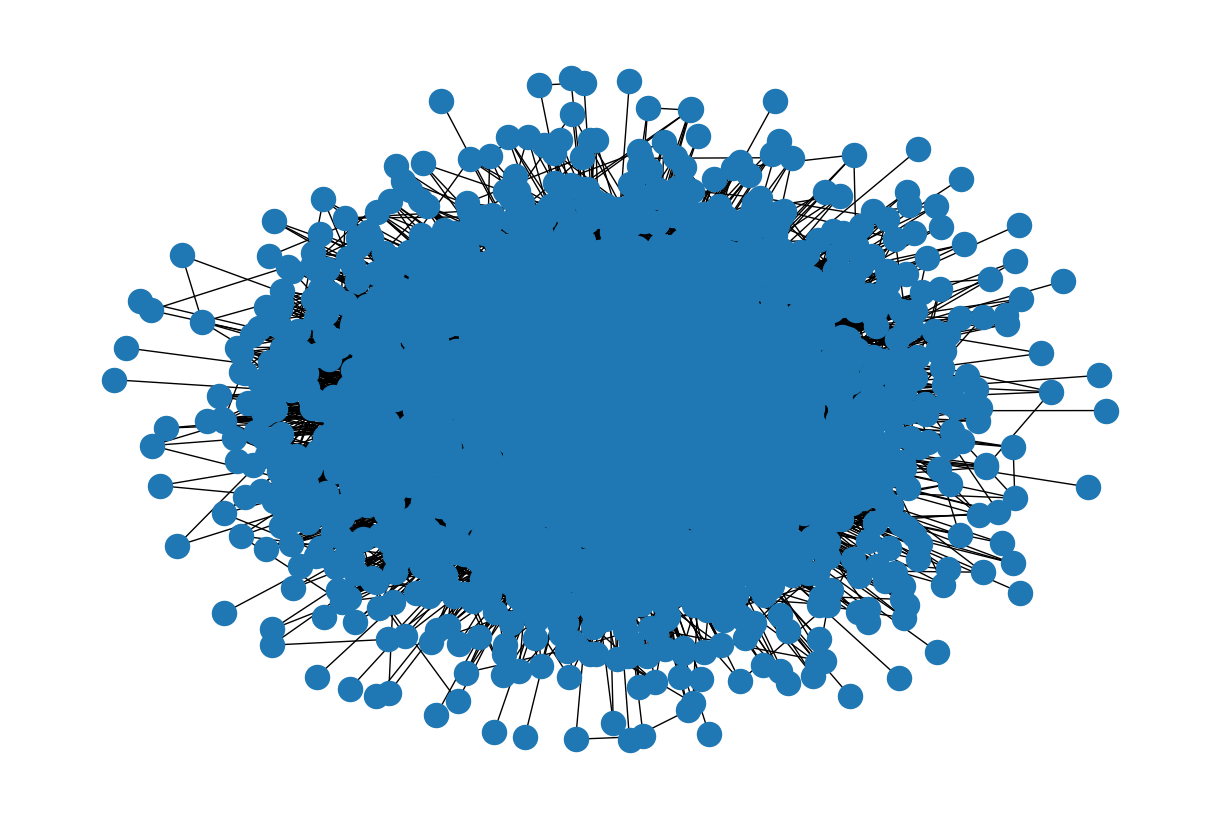

In [176]:
plt.figure(figsize=(12, 8))
D = nx.ego_graph(fb, max_cent_node)
nx.draw(D)
plt.show()


In [192]:
#Plotly visualisation
pos = spring_layout(D)
nx_graph_trace = go.Scatter(
    x=[pos[n][0] for n in D.nodes()],
    y=[pos[n][1] for n in D.nodes()],
    mode='markers+lines',
    line=dict(width=1, color='#888'),
    marker=dict(size=10, color='skyblue')
)

fig = go.Figure(data=[nx_graph_trace])

fig.update_layout(
    width=800,  
    height=800,  
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), 
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white'
)

fig.show()


In [177]:
# tried to do this for betweenness centrality and ran for 90+ minutes before I force-stopped it!

fb_eig_cent = dict(nx.eigenvector_centrality(fb)).values()
# Let's just print the top 20 eigenvector centrality values:
print(sorted(fb_eig_cent, reverse=True)[:20])


[0.25910542056097713, 0.2363111871302258, 0.18748353351351799, 0.14338505814183525, 0.10830680658673174, 0.10821057390019871, 0.10660966192705273, 0.0990410376430482, 0.09653156074399234, 0.08426151405832155, 0.08080788081361173, 0.07443606950846889, 0.07393608405052841, 0.07331457066450278, 0.07069037339683966, 0.06734948565912925, 0.06733592902645064, 0.06666951231003901, 0.0650620030169413, 0.06153222953261829]


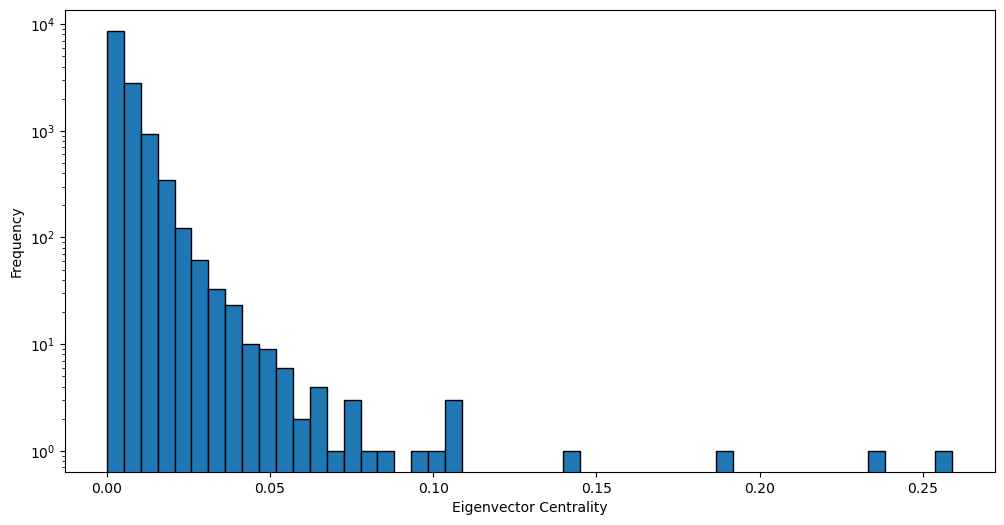

In [194]:
# Histogram of all eigenvector centrality values
plt.figure(figsize=(12, 6))
plt.hist(fb_eig_cent, bins=50, edgecolor='black')
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()



In [179]:
#fb_close_cent = dict(nx.closeness_centrality(fb)).values()
#print(sorted(fb_close_cent, reverse=True)[:20])

# This also takes a long time to run.